In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


# This model is focusing on predicting the price of the house in boston, given a set of features that describe the house. 

# In this dataset, each row describes a boston town or suburb. There are 506 rows and 13 attributes (features) with a target column (price). https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

# Apply EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.datasets import load_boston
house = load_boston()
data = pd.DataFrame(house.data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Feature Names:

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centres

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per 10,000usd

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT %: lower status of the population

In [4]:
data.columns=house.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Each Record describes a town or suburb

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
data['Price']=house.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.shape

(506, 14)

In [8]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

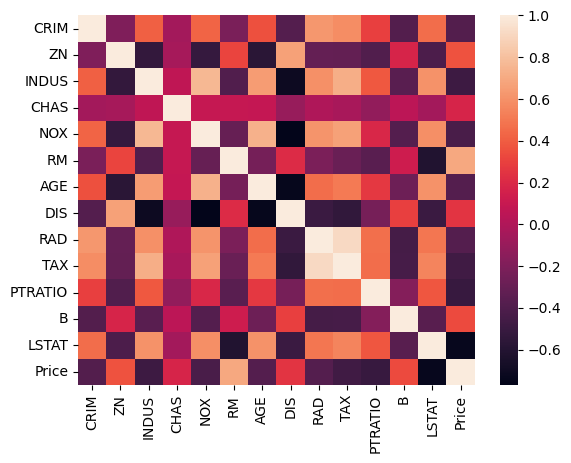

In [10]:
corr=data.corr()
sns.heatmap(corr)


<AxesSubplot:xlabel='Price', ylabel='Count'>

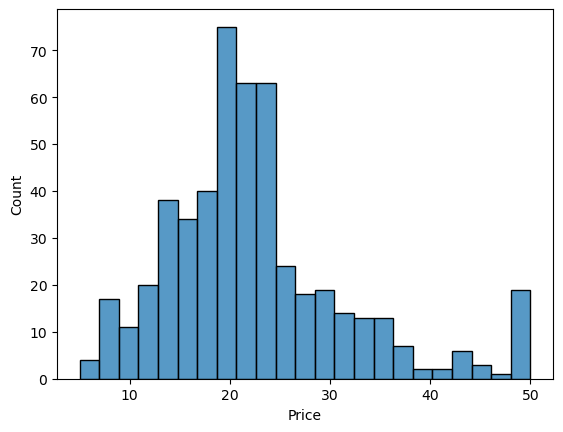

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.histplot(data['Price'])

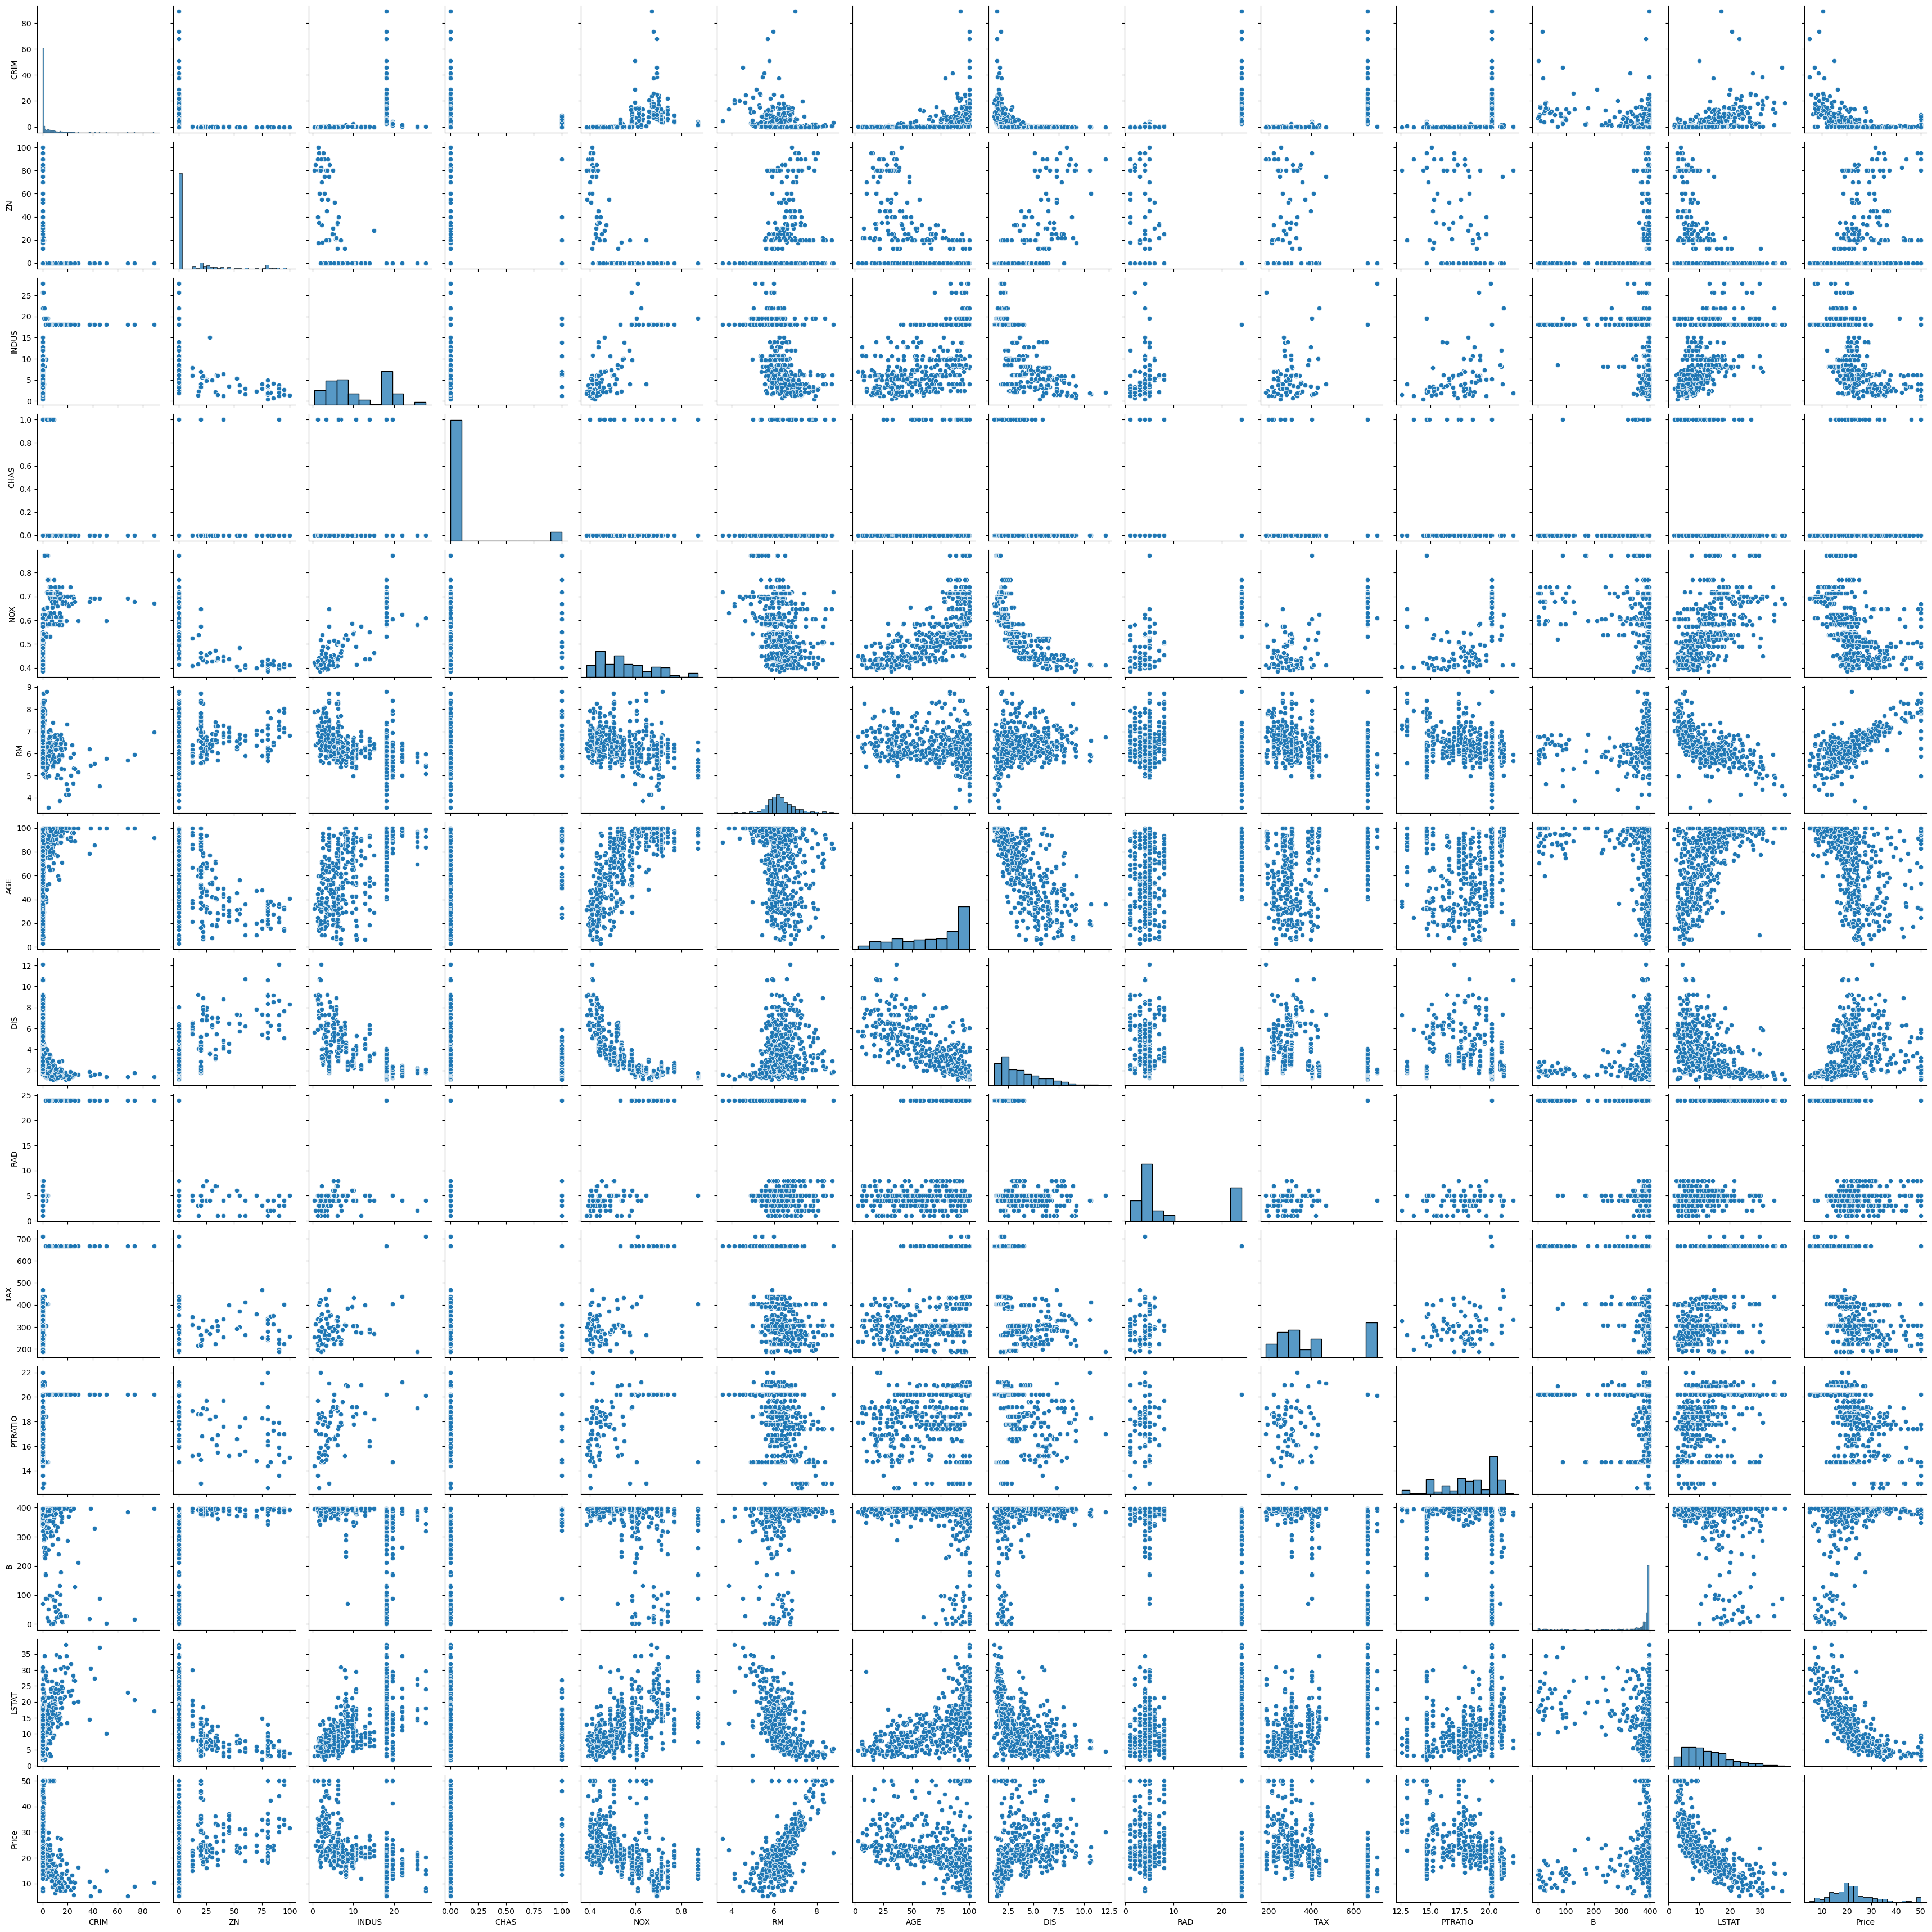

In [41]:
#sns.pairplot(data)

In [11]:
# Spliting target variable and independent variables
X = data.drop(['Price'], axis = 1)
y = data['Price']

In [30]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [38]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaled_X_train=Scaler.fit_transform(X_train)
Scaled_X_test=Scaler.fit_transform(X_test)


In [39]:
Scaled_X_train

array([[-0.42546852, -0.47076769, -0.95468627, ...,  0.00545961,
         0.44188904, -0.44481854],
       [-0.42632345,  2.99257588, -1.3301574 , ...,  1.61604587,
         0.28749838, -0.66643827],
       [-0.3851898 , -0.47076769, -0.7058275 , ..., -0.50072464,
         0.42371255,  1.22650481],
       ...,
       [ 0.62797244, -0.47076769,  1.02599668, ...,  0.78774436,
         0.44188904,  1.42695069],
       [-0.42164728, -0.47076769, -1.01872011, ..., -0.86885864,
         0.40170367, -0.44199536],
       [-0.42068632, -0.47076769,  2.12475908, ...,  0.28156011,
         0.23592534,  0.72821331]])

In [40]:
Scaled_X_test

array([[-3.68998988e-01, -1.38677536e-04, -5.09555940e-01, ...,
        -1.48812077e+00,  3.26142192e-01,  2.42391983e+00],
       [-3.90301961e-01,  1.68618016e+00, -8.84134205e-01, ...,
        -8.32891927e-01,  1.62149582e-01, -3.96062600e-01],
       [-3.78582604e-01, -1.38677536e-04, -7.73964127e-01, ...,
         2.43555458e-01,  4.39100214e-01,  9.83319688e-02],
       ...,
       [-3.91892056e-01, -5.27113314e-01, -9.03230352e-01, ...,
         8.51982241e-01,  4.16112652e-01, -2.51058606e-01],
       [-3.92244004e-01,  2.63473451e+00, -1.23227165e+00, ...,
        -3.72569032e-02,  4.25131695e-01, -1.11279663e+00],
       [ 8.99755257e-01, -5.27113314e-01,  9.93163927e-01, ...,
         8.51982241e-01,  2.49920275e-01,  7.80541234e-01]])

# Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(Scaled_X_train,y_train)
predictions=lr.predict(Scaled_X_test)


In [43]:
#Function that will return our regression result 
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [45]:
def modelresults(predictions):
    print("Mean Absolute Error on model is {}".format(mean_absolute_error(y_test,predictions)))
    print("Mean Squared Error on model is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

In [46]:
modelresults(predictions)

Mean Absolute Error on model is 3.799004505430752
Mean Squared Error on model is 5.690282422959871


In [48]:
from sklearn.metrics import r2_score
r2_score(y_test,lr.predict(Scaled_X_test))

0.6899129320113265